In [1]:
# imports

import gym
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [2]:
# grid world

class custom_gridworld(object):
    def __init__(self,model):
        self.model = model
        self.grid = np.zeros((12,12))
        self.state_space = [i for i in range(12*12)]
        self.action_space = {'u':-12,'d':12,'r':1,'l':-1}
        self.possible_actions = ['u','d','r','l']
        self.agent_position = rd.choice([60,72,120,132])
        self.one_takers = [27,28,29,30,31,32,39,39+12,39+2*12,39+3*12,39+4*12,99,100,101,102,103,91,79,80,80-12,80-2*12,80-3*12]
        self.two_takers = [40,41,42,43,40+12,40+2*12,40+3*12,40+4*12,89,90,78,78-12,67,67-12]
        self.three_takers = [53,54,65,77]
        self.record = [self.agent_position]
        self.grid[self.agent_position//12,self.agent_position%12] = 1
        self.imj = np.zeros((12,12))
        for i in self.one_takers:
            self.imj[i//12][i%12] = -1
        for i in self.two_takers:
            self.imj[i//12][i%12] = -2
        for i in self.three_takers:
            self.imj[i//12][i%12] = -3
        for i in [60,72,120,132]:
            self.imj[i//12][i%12] = -10
        if(self.model == 'A'):
            self.imj[11//12][11%12] = 10
        elif(self.model == 'B'):
            self.imj[33//12][33%12] = 10
        elif(self.model == 'C'):
            self.imj[79//12][79%12] = 10
        
        
    # function names are self explanatory    
    def is_terminal(self,state):
        if(self.model == 'A'):
            if(state == 11):
                return True
            else:
                return False
        elif(self.model == 'B'):
            if(state == 33):
                return True
            else:
                return False
        elif(self.model == 'C'):
            if(state == 79):
                return True
            else:
                return False
        else:
            return False # wrong model input

    def get_row_column(self):
        x = self.agent_position // 12
        y = self.agent_position % 12
        return x,y

    def set_state(self,state):
        x,y = self.get_row_column()
        self.grid[x][y] = 0
        self.agent_position = state
        x,y = self.get_row_column()
        self.grid[x][y] = 1


    def off_grid(self,old,new):
        if(new not in self.state_space):
            return True
        elif(old%12 == 11 and new%12 == 0):
            return True
        elif(old%12 == 0 and new%12 == 11):
            return True
        else:
            return False


    def step(self,action):
        if(self.model == 'C'):
            if(rd.random() < 0.1):
                act = rd.choice([x for x in self.possible_actions if x != action])
                fin_state = self.agent_position + self.action_space[act]
            else:
                fin_state = self.agent_position + self.action_space[action]
        else:
            if(rd.random() < 0.5):
                fin_state = self.agent_position + self.action_space['r']
            else:
                if(rd.random() < 0.1):
                    act = rd.choice([x for x in self.possible_actions if x != action])
                    fin_state = self.agent_position + self.action_space[act]
                else:
                    fin_state = self.agent_position + self.action_space[action]

        reward = 0
        if(self.off_grid(self.agent_position,fin_state)):
            self.set_state(self.agent_position)
            if(self.is_terminal(self.agent_position)):
                reward = 10
            elif(self.agent_position in self.one_takers):
                reward = -1
            elif(self.agent_position in self.two_takers):
                reward = -2
            elif(self.agent_position in self.three_takers):
                reward = -3
            self.record.append(self.agent_position)
            return self.agent_position, reward, self.is_terminal(self.agent_position),None
        else:
            self.set_state(fin_state)
            if(self.is_terminal(self.agent_position)):
                reward = 10
            elif(self.agent_position in self.one_takers):
                reward = -1
            elif(self.agent_position in self.two_takers):
                reward = -2
            elif(self.agent_position in self.three_takers):
                reward = -3
            self.record.append(self.agent_position)
            return self.agent_position, reward, self.is_terminal(self.agent_position),None

    def reset(self):
        x,y = self.get_row_column()
        self.grid[x,y] = 0
        self.agent_position = rd.choice([60,72,120,132])
        x,y = self.get_row_column()
        self.grid[x,y] = 1
        self.record = [self.agent_position]
        return self.agent_position

    def render(self,path=False):
        print('-----------------------')
        for i in range(12):
            for j in range(12):
                if(path):
                    if(((12*i)+j) in self.record):
                        print('p',end=" ")
                    elif(self.imj[i][j] == 10):
                        print('d',end=" ")
                    elif(self.imj[i][j] == -10):
                        print('s',end=" ")
                    elif(self.imj[i][j] == 0):
                        print('*',end=" ")
                    elif(self.imj[i][j] == -2):
                        print('y',end=" ")
                    elif(self.imj[i][j] == -3):
                        print('z',end=" ")
                    else:
                        print('x',end=" ")
                    
                else:
                    if(self.grid[i][j] == 1):
                        print('p',end=" ")
                    elif(self.imj[i][j] == 10):
                        print('d',end=" ")
                    elif(self.imj[i][j] == -10):
                        print('s',end=" ")
                    elif(self.imj[i][j] == 0):
                        print('*',end=" ")
                    elif(self.imj[i][j] == -2):
                        print('y',end=" ")
                    elif(self.imj[i][j] == -3):
                        print('z',end=" ")
                    else:
                        print('x',end=" ")
            print()
        print('-----------------------')


In [21]:
# Q learning

EPS = 0.1
ALFA = 0.15
GAMMA = 0.9
alf_min = 0.01
alf_decay = 1 # 0.99
eps_min = 0.0001
eps_decay = 1 # 0.999

num_episodes = 1000

envQ = custom_gridworld('C')
mod = envQ.model


var_Q = []
var_rwd = []
var_steps = []
var_srwd = []
Q = {}

for ir in range(50):
    tot_rwd = []
    num_steps = []
    step_rwd = []
    Q.clear()
    # initialization
    for st in envQ.state_space:
        for act in envQ.possible_actions:
            Q[st,act] = 0

    for i in range(1,num_episodes+1):

        over = False
        ep_rwd = 0
        steps = 0
        pos = envQ.reset()

        while not over:
            # epsilon greedy pick of action
            if(rd.random() > EPS):
                vals = np.array([Q[pos,a] for a in envQ.possible_actions])
                act = envQ.possible_actions[np.argmax(vals)]
                if(Q[pos,act] == 0):
                    act = rd.choice(envQ.possible_actions)
            else:
                act = rd.choice(envQ.possible_actions)
            new_pos,rwd,over,dc = envQ.step(act)
            new_vals = np.array([Q[new_pos,a] for a in envQ.possible_actions])
            new_act = envQ.possible_actions[np.argmax(new_vals)]
            Q[pos,act] = Q[pos,act] + ALFA*(rwd + GAMMA*Q[new_pos,new_act] - Q[pos,act])

            pos = new_pos
            ep_rwd += rwd
            steps += 1

        if(i%(num_episodes) == 0):
            print("Episode"+str(i)+":"+str(ep_rwd))
            print("alf:"+str(ALFA))
            print("eps:"+str(EPS))
            envQ.render(True)

#         # alfa decay until it reaches minimum
#         if(ALFA > alf_min and i%10 == 0):
#             ALFA = ALFA*alf_decay

#         # eps decay until it reaches minimum
#         if(EPS > eps_min and i%10 == 0):
#             EPS = EPS*eps_decay

        tot_rwd.append(ep_rwd)
        num_steps.append(steps)
        step_rwd.append(ep_rwd/steps)
        
    var_rwd.append(tot_rwd)
    var_steps.append(num_steps)
    var_srwd.append(step_rwd)
        
    

Episode1000:9
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* * * x y y y y x * * * 
* * * x y z z y x * * * 
s * * x y z y y x * * * 
s * * x y z y p x * * * 
* * * x y y y p p p * * 
* * * x x x x x * p * * 
* * * * * * * * * p * * 
s * * * p p p p p p * * 
p p p p p p * p * * * * 
-----------------------
Episode1000:8
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* * * x y y y y x * * * 
* * * x y z z y x * * * 
s * * x y z y y x * * * 
s * * x y z y p x * * * 
* * * x y y y p * * * * 
* * * x x x x p p * * * 
* * * * * * p p p * * * 
p p p p p p p * * * * * 
p * * * * * * * * * * * 
-----------------------
Episode1000:8
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* p p x y y y y x * * * 
* p p p y z z y x * * * 
p p p x y z y y x * * * 
p p * x y z y p p * * * 
* p * x y y 

Episode1000:5
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* * * x y y y y x * * * 
* * * x y z z y x * * * 
p * * x y z y y x * * * 
p * * x y z y p p * * * 
p * * x y y y p p * * * 
p * * x x x x p * * * * 
p * * * * p p p * * * * 
p p p p p p p * * * * * 
s * * * p p * * * * * * 
-----------------------
Episode1000:6
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* * * x y y y y x * * * 
* * * x y z z y x * * * 
p * * x y z y y x * * * 
p * * x y z y p x * * * 
p * * x y y y p * * * * 
p p * x x x x p * * * * 
* p * * * * * p * * * * 
s p p p p p p p * * * * 
s * * * * * * * * * * * 
-----------------------
Episode1000:8
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* * * x y y y y x * * * 
* * * x y z z y x * * * 
s * * x y z y y x * * * 
s * * x y z y p x * * * 
* * * x y y 

Episode1000:9
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* * * x y y y y x * * * 
* * * x y z z y x * * * 
s * * x y z y y x * * * 
s * * x y z y p p * * * 
* * * x y y y x p * * * 
* * * x x x x x p * * * 
* * * * p p * * p * * * 
p p p p p p p p p * * * 
s * * * * p p * * * * * 
-----------------------
Episode1000:8
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* * * x y y y y x * * * 
* * * x y z z y x * * * 
s * * x y z y y x * * * 
s * * x y z y p x * * * 
* * * x y y y p * * * * 
* * * x x x x p * * * * 
* * * * * * * p * * * * 
p p * p * * p p * * * * 
s p p p p p p * * * * * 
-----------------------
Episode1000:9
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* * * x y y y y x * * * 
* * * x y z z y x * * * 
s * * x y z y y x * * * 
p * * x y z y p p * * * 
p * * x y y 

In [22]:
fin_rwdQ = np.mean(var_rwd,axis=0)
fin_stepsQ = np.mean(var_steps,axis=0)
fin_srwdQ = np.mean(var_srwd,axis=0)

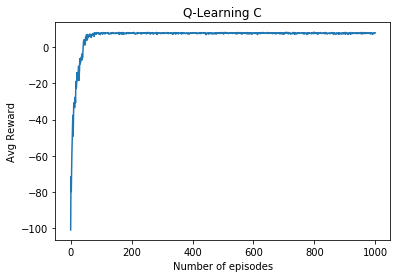

In [23]:
# Avg Reawrd per step vs episode

tot = 0
avg_rwd_step = []
for i,val in enumerate(fin_rwdQ):
    tot += val
    if((i+1)%50 == 0):
        avg_rwd_step.append(tot/50)
        tot = 0

plt.plot(fin_rwdQ)
plt.xlabel('Number of episodes')
plt.ylabel('Avg Reward')
plt.title('Q-Learning '+mod)
plt.show()

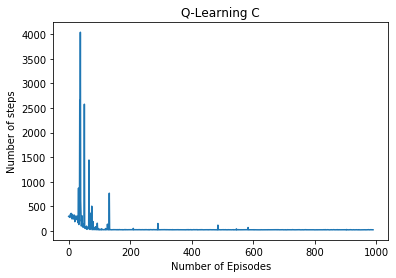

In [24]:
# num steps vs episodes

sum = 0
avg_num_steps = []
for i,val in enumerate(fin_stepsQ):
    sum += val
    if((i+1)%50 == 0):
        avg_num_steps.append(sum/50)
        sum = 0

plt.plot(fin_stepsQ[10:])
plt.xlabel('Number of Episodes')
plt.ylabel('Number of steps')
plt.title('Q-Learning '+mod)
#plt.ylim(0,100)
plt.show()

In [25]:
over = False
pos = envQ.reset()
tt_rd = 0
sts = 0
while (not over):
    vals = np.array([Q[pos,a] for a in envQ.possible_actions])
    act = envQ.possible_actions[np.argmax(vals)]
    new_pos,rwd,over,dc = envQ.step(act)
    pos = new_pos
    tt_rd += rwd
    sts += 1

print("variant:"+mod)
print("steps:"+str(sts))
print("reward:"+str(tt_rd))
envQ.render(True)

variant:C
steps:14
reward:9
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x * * * 
* * * x y y y y x * * * 
* * * x y z z y x * * * 
s * * x y z y y x * * * 
s * * x y z y p p * * * 
* * * x y y y x p * * * 
* * * x x x x x p * * * 
* * * * * * * * p * * * 
s * * * * * p p p * * * 
p p p p p p p * * * * * 
-----------------------


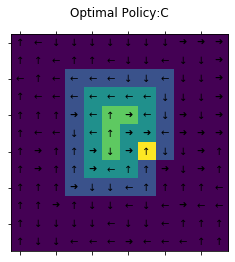

In [26]:
opt = np.zeros((12,12))
arrow = {1:"↑",2:"➜",3:"↓",4:"←"}
opt_conv = {"u":1,"r":2,"d":3,"l":4}
fig,ax = plt.subplots()
# spacing = 1
# ax.yaxis.set_minor_locator(plt.MultipleLocator(spacing))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(spacing))
# plt.grid(which = 'both')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_formatter(plt.NullFormatter())
for x in range(12):
    for y in range(12):
        vals = np.array([Q[x*12+y,a] for a in envQ.possible_actions])
        opt[x,y] = opt_conv[envQ.possible_actions[np.argmax(vals)]]
        ax.text(x,y,arrow[opt[x,y]],va="center",ha="center")
        p = 12*x+y
        if p in envQ.one_takers:
            opt[x,y] = 1
        elif p in envQ.two_takers:
            opt[x,y] = 2
        elif p in envQ.three_takers:
            opt[x,y] = 3
        else:
            opt[x,y] = 0
if(mod == 'A'):
    opt[0,11] = 4
elif(mod == 'B'):
    opt[2,9] = 4
else:
    opt[6,7] = 4
ax.matshow(opt,origin='upper')
plt.title('Optimal Policy:'+mod)
plt.show()

In [13]:
# SARSA(lamda)

LAMDA = 0.5
EPS = 0.1
ALFA = 0.15
GAMMA = 0.9
alf_min = 0.0001
alf_decay = 1 # 0.999 lesser rate than eps
eps_min = 0.0001
eps_decay = 1 # 0.99

num_episodes = 100
envS = custom_gridworld('A')

var_rwd = []
var_steps = []
var_srwd = []

for ir in range(5):
    tot_rwd = []
    num_steps = []
    step_rwd = []
    Q = {}
    E = {}
    # initialization
    for st in envS.state_space:
        for act in envS.possible_actions:
            Q[st,act] = 0
            E[st,act] = 0


    for i in range(1,num_episodes+1):

        over = False
        ep_rwd = 0
        steps = 0
        pos = envS.reset()

        while not over:
            # epsilon greedy pick of action
            if(rd.random() > EPS):
                vals = np.array([Q[pos,a] for a in envS.possible_actions])
                act = envS.possible_actions[np.argmax(vals)]
                if(Q[pos,act] == 0):
                    act = rd.choice(envQ.possible_actions)
            else:
                act = rd.choice(envS.possible_actions)

            new_pos,rwd,over,dc = envS.step(act)
            # epsilon greedy pick of next action to use in equation
            if(rd.random() > EPS):
                new_vals = np.array([Q[new_pos,a] for a in envS.possible_actions])
                new_act = envS.possible_actions[np.argmax(new_vals)]
            else:
                new_act = rd.choice(envS.possible_actions)
            delta = rwd + GAMMA*Q[new_pos,new_act] - Q[pos,act]
            Q.update((x,y + ALFA*delta*E[x[0],x[1]]) for x,y in Q.items())
            E.update((x, y*GAMMA*LAMDA) for x, y in E.items())
            E[pos,act] = E[pos,act] + 1

            pos = new_pos
            ep_rwd += rwd
            steps += 1

        if(i%(num_episodes) == 0):
            print("Episode"+str(i)+":"+str(ep_rwd))
            print("alf:"+str(ALFA))
            print("eps:"+str(EPS))
            envS.render(True)

        # alfa decay until it reaches minimum
        if(ALFA > alf_min and i%10 == 0):
            ALFA = ALFA*alf_decay

        # eps decay until it reaches minimum
        if(EPS > eps_min and i%10 == 0):
            EPS = EPS*eps_decay

        tot_rwd.append(ep_rwd)
        num_steps.append(steps)
        step_rwd.append(ep_rwd/steps)
        
    var_rwd.append(tot_rwd)
    var_steps.append(num_steps)
    var_srwd.append(step_rwd)

Episode100:10
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * p 
* * * * * * * * * * * p 
* * * x x x x x x * p p 
* * * x y y y y x p p p 
* * * x y z z y x p p p 
s * * x y z y y x p p p 
s * * x y z y x x p p p 
* * * x y y y x * p p p 
* * * x x x x x * * p * 
* * * * * * * * * * p p 
p p * * * * p p p p p p 
s p p p p p p p p p p p 
-----------------------
Episode100:8
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * p 
* * * * * * * * * p p p 
* * * x x x x x x p p p 
* * * x y y y y x p p p 
* * * x y z z y x * p p 
s * * x y z y y x * p p 
s * * x y z y x x * p p 
* * * x y y y p p p p p 
* * * x x x x p p p p p 
* * * * * * p p * * p p 
s * * * * * p * p p p p 
p p p p p p p * p p * * 
-----------------------
Episode100:-3
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * p 
* * * * * * * * * * * p 
* * * x x x x x x * * p 
p p * x y y y y x * * p 
p p p p y z z y x * p p 
p * p p p p p p p p p p 
s * * x y z y x x p p p 
* * * x y y y

KeyboardInterrupt: 

In [ ]:
fin_rwdS = np.mean(var_rwd,axis=0)
fin_stepsS = np.mean(var_steps,axis=0)
fin_srwdS = np.mean(var_srwd,axis=0)

In [ ]:
# Avg Reawrd per step vs episode

sum = 0
avg_rwd_step = []
for i,val in enumerate(fin_rwdS):
    sum += val
    if((i+1)%50 == 0):
        avg_rwd_step.append(sum/50)
        sum = 0

plt.plot(fin_rwdS)
plt.xlabel('Number of episodes')
plt.ylabel('Avg Reward')
plt.title('SARSA')
plt.show()

In [ ]:
# num steps vs episodes

sum = 0
avg_num_steps = []
for i,val in enumerate(fin_stepsS):
    sum += val
    if((i+1)%50 == 0):
        avg_num_steps.append(sum/50)
        sum = 0

plt.plot(fin_stepsS)
plt.xlabel('Number of Episodes')
plt.ylabel('Number of steps')
plt.title('SARSA')
plt.show()

In [33]:
# SARSA(lamda)

# LAMDA = 0.5
all_L = [0, 0.3, 0.5, 0.9, 0.99, 1.0]
EPS = 0.1
ALFA = 0.15
GAMMA = 0.9
alf_min = 0.0001
alf_decay = 1 # 0.999 lesser rate than eps
eps_min = 0.0001
eps_decay = 1 # 0.99

num_episodes = 25
envS = custom_gridworld('B')
mod = envS.model

finl_rwd = []
finl_steps = []

for LAMDA in all_L:
    var_rwd = []
    var_steps = []
    var_srwd = []

    for ir in range(10):
        tot_rwd = []
        num_steps = []
        step_rwd = []
        Q = {}
        E = {}
        # initialization
        for st in envS.state_space:
            for act in envS.possible_actions:
                Q[st,act] = 0
                E[st,act] = 0


        for i in range(1,num_episodes+1):

            over = False
            ep_rwd = 0
            steps = 0
            pos = envS.reset()

            while not over:
                # epsilon greedy pick of action
                if(rd.random() > EPS):
                    vals = np.array([Q[pos,a] for a in envS.possible_actions])
                    act = envS.possible_actions[np.argmax(vals)]
                    if(Q[pos,act] == 0):
                        act = rd.choice(envQ.possible_actions)
                else:
                    act = rd.choice(envS.possible_actions)

                new_pos,rwd,over,dc = envS.step(act)
                # epsilon greedy pick of next action to use in equation
                if(rd.random() > EPS):
                    new_vals = np.array([Q[new_pos,a] for a in envS.possible_actions])
                    new_act = envS.possible_actions[np.argmax(new_vals)]
                else:
                    new_act = rd.choice(envS.possible_actions)
                delta = rwd + GAMMA*Q[new_pos,new_act] - Q[pos,act]
                E[pos,act] = E[pos,act] + 1
                Q.update((x,y + ALFA*delta*E[x[0],x[1]]) for x,y in Q.items())
                E.update((x, y*GAMMA*LAMDA) for x, y in E.items())

                pos = new_pos
                ep_rwd += rwd
                steps += 1

            if(i%(num_episodes) == 0):
                print("Episode"+str(i)+":"+str(ep_rwd))
                print("lamda:"+str(LAMDA))
                print("alf:"+str(ALFA))
                print("eps:"+str(EPS))
                envS.render(True)

            # alfa decay until it reaches minimum
            if(ALFA > alf_min and i%10 == 0):
                ALFA = ALFA*alf_decay

            # eps decay until it reaches minimum
            if(EPS > eps_min and i%10 == 0):
                EPS = EPS*eps_decay

            tot_rwd.append(ep_rwd)
            num_steps.append(steps)
            step_rwd.append(ep_rwd/steps)

        var_rwd.append(tot_rwd)
        var_steps.append(num_steps)
        var_srwd.append(step_rwd)
    
    finl_rwd.append(np.mean(var_rwd,axis=0))
    finl_steps.append(np.mean(var_steps,axis=0))
    


Episode25:10
lamda:0
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x p p p 
* * * x y y y y x * * p 
* * * x y z z y x * * p 
s * * x y z y y x * * p 
s * * x y z y x x * * p 
* * * x y y y x * * * p 
* * * x x x x x * * * p 
* * * * * * * * * * * p 
p p p p p p * * * * p p 
s * * * * p p p p p p p 
-----------------------
Episode25:6
lamda:0
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x p * * 
* * * x y y y y p p p p 
* * * x y z z y x * p p 
s * * x y z y y x * * p 
s * * x y z y x x * * p 
* * * x y y y p * * * p 
* * * x x x x p p p p p 
* * * * p p p p * * * * 
p p * * p p * * * * * * 
p p p p p * * * * * * * 
-----------------------
Episode25:-6
lamda:0
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* p p p x x x x p p * * 
p p p p p p p p p * * * 
p p * x y z z y x * * * 
p p * x y z y y x * * * 
s * * x y z y x x

Episode25:10
lamda:0.5
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * p 
* * * x x x x x x p p p 
* * * x y y y y x * p p 
* * * x y z z y x * p p 
s * * x y z y y x * * p 
s * * x y z y x x * * p 
* * * x y y y x * * * p 
* * * x x x x x * * * p 
* * * p p p p p p p p p 
p p p p * * * p * * p * 
s * * * * * * p * * * * 
-----------------------
Episode25:-4
lamda:0.5
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x p p * 
* * * x y y y y x * p p 
p p p p p p p p x * * p 
p * * x y z y p p p p p 
s * * x y z y x x * * * 
* * * x y y y x * * * * 
* * * x x x x x * * * * 
* * * * * * * * * * * * 
s * * * * * * * * * * * 
s * * * * * * * * * * * 
-----------------------
Episode25:2
lamda:0.5
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * p 
* * * * * * * * * p p p 
* * * x x x x x x p p p 
* * * x y y y y x * * p 
* * * x y z z y x * * p 
s * * x y z y y x * * p 
s * * x y z

Episode25:-3
lamda:0.99
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * p p p 
* * * * * * * * * p p p 
* * * x x x x x x p p p 
* * * x y y y y x p p p 
p p p p p p p p p p p p 
p * * x y z y y x p p p 
s * * x y z y x x * * p 
* * * x y y y x * * p p 
* * * x x x x x p p p p 
* * * * * * * * p p p p 
s * * * * * * * * p p p 
s * * * * * * * * * p p 
-----------------------
Episode25:-3
lamda:0.99
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * p p 
* * * x x x x x x p p p 
* * * x p p p p p p p p 
* * * p p z z y x * p p 
p p p p y z y y x * p p 
s * * x y z y x x * p p 
* * * x y y y x * * p p 
* * * x x x x x * p p p 
* * * * * * * * * p p p 
s * * * * * * * * p p p 
s * * * * * * * * * p p 
-----------------------
Episode25:-17
lamda:0.99
alf:0.15
eps:0.1
-----------------------
* * * * * * * * * * * * 
* * * * * * * * * * * * 
* * * x x x x x x p * * 
* * * x y y y y x p p * 
* * * x y z z y x * p p 
p p p p y z y y x * * p 
s * * 

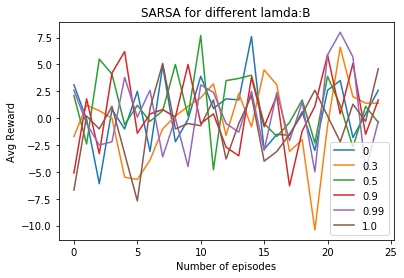

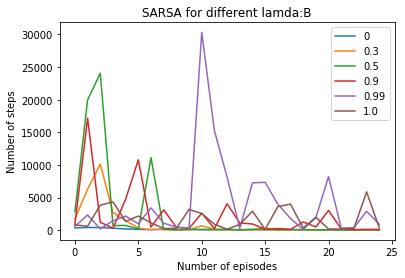

In [34]:
for l,r in enumerate(finl_rwd):
    plt.plot(r)
plt.xlabel('Number of episodes')
plt.ylabel('Avg Reward')
plt.title('SARSA for different lamda:'+mod)
plt.legend(("0", "0.3", "0.5", "0.9", "0.99", "1.0"),loc='best')
plt.show()

for l,r in enumerate(finl_steps):
    plt.plot(r)
plt.xlabel('Number of episodes')
plt.ylabel('Number of steps')
plt.title('SARSA for different lamda:'+mod)
plt.legend(("0", "0.3", "0.5", "0.9", "0.99", "1.0"),loc='best')
plt.show()

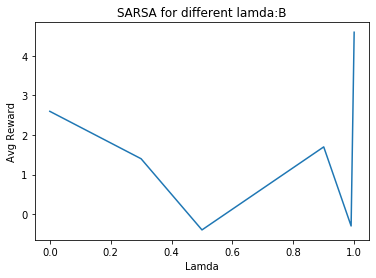

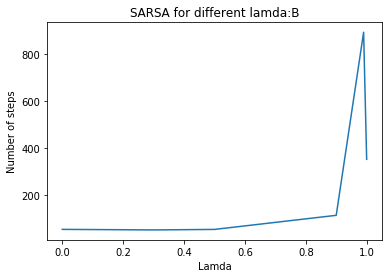

In [35]:
plt.plot(all_L,np.array(finl_rwd)[:,-1])
plt.xlabel('Lamda')
plt.ylabel('Avg Reward')
plt.title('SARSA for different lamda:'+mod)
plt.show()
plt.plot(all_L,np.array(finl_steps)[:,-1])
plt.xlabel('Lamda')
plt.ylabel('Number of steps')
plt.title('SARSA for different lamda:'+mod)
plt.show()

In [ ]:
for l,r in enumerate(finl_rwd):
    plt.plot(r)
    plt.xlabel('Number of episodes')
    plt.ylabel('Avg Reward')
    plt.title('SARSA:'+str(all_L[l])+":"+mod)
    plt.show()